In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from string import ascii_letters
from scipy.optimize import fsolve

In [ ]:
def solve_for_G(mu):
    func = lambda G : G - mu * np.exp(G - mu)
    G = np.linspace(0.000, 1.000, 1000)
    
    #plt.plot(G, func(G))
    #plt.xlabel("G")
    #plt.ylabel("expression value")
    #plt.grid()
    #plt.show()

    # Use the numerical solver to find the roots
    
    G_initial_guess = 0.5
    G_soln = fsolve(func, G_initial_guess)
    #print("The solution is G = %f" % G_soln)
    #print("at which the value of the expression is %f" % func(G_soln))
    return G_soln[0]

def ln_stirling_2nd(n, k):
    mu = n/k
    G = solve_for_G(mu)
    return 0.5 * (math.log(mu - 1) - math.log(mu * (1 - G))) + \
        (n - k) * (math.log(mu - 1) - math.log(mu - G)) + \
            n * math.log(k) - k * math.log(n) + k * (1 - G) + \
                ln_n_fact(n) - ln_n_fact(n - k) - ln_n_fact(k)

def ln_n_fact(n):
    if(n > 8):
        return 0.5 * math.log(2*math.pi) - n + (n + 0.5) * math.log(n)
    else: 
        return math.log(math.factorial(n))

def P(x, n, l):
    if(x > int(l/n)):
        return 0
    elif(x == int(l/n)):
        return math.e**(ln_n_fact(2**n) - ln_n_fact(2**n - x) + ((l%n) - l) * math.log(2))
    else:
        Term_1 = ln_n_fact(2**n) - ln_n_fact(2**n - x) 
        #Term_2 = ln_n_fact(int(l/n)) - ln_n_fact(int(l/n) - x) + x * math.log(int(l/n))
        Term_2 = ln_stirling_2nd(int(l/n), x)
        Term_3 = ((l%n) - l) * math.log(2)
        #print(Term_1, Term_2, Term_3)
        #print(math.e ** (Term_1 + Term_2 + Term_3))
        return math.e ** (Term_1 + Term_2 + Term_3)

def E(n, l):
    p = [P(x, n, l) for x in range(1, 2 ** n + 1)]
    #print(p)
    E_of_n_l = [p[x-1] * x for x in range(1, 2**n + 1)]
    #print("E(", n, "\b,", l, "\b)", sum(E_of_n_l))
    return sum(E_of_n_l)

In [ ]:
def extractor(length,string):    #Extract patterns corresponding for each length
    i=0
    k=[]
    while i<len(string):
        k.append(tuple(string[i:i+length]))
        i=i+length
    k=set(k)
    return len(k)

In [ ]:
def pattern(string,stop):              #Extract patterns corresponding for different lengths
    m=[]
    for i in string:
        m.append(i)
    m=set(m)
    m=len(m)
    k=[]
    j=[]
    last=0
    count=0
    x=stop
    batch=len(string)//x
    for i in range(2,x):
        v=extractor(i,string[:i*batch])
        j.append(v)
        k.append(E(i,len(string)))
    return j,k

In [ ]:
def max_increase(m): 
  m=np.array(m)
  ind = np.argmax(m)
  return ind+2

In [ ]:
def max_increase(seq):          #Find the point of maximum increase
    i = 0
    maximum_increase = 0
    ind=0
    difference=0
    for i in range(1,len(seq)):
        difference = seq[i]-seq[i-1]
        if difference>maximum_increase:
            maximum_increase=difference
            ind=i
    return ind+2

In [ ]:
def plot(string,start,stop):        #Plot the Compactness score 
    one,two=pattern(string,stop)
    one=one[start:stop]
    two=two[start:stop]
    m=1-np.divide(one,two)
    x=max_increase(m)
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(111)
    ax.plot(np.linspace(2,len(one)+1,len(one)),one, '-', color='blue',label = 'Number of unique patterns',marker='.')
    ax.set_xticks(np.linspace(2,len(one)+1,len(one)))
    ax.axvline(x=x)
    ax2 = ax.twinx()
    ax2.plot(np.linspace(2,len(one)+1,len(one)),(1-np.divide(one,two)), '-r', label = 'Compactness Score')
    ax2.axhline(y=len(string), color='purple', linestyle='-.')
    ax2.set_ylim([0,1.10])
    ax.legend(loc=7)
    ax2.legend(loc=6)
    ax.grid()
    ax.set_xlabel("Length of Pattern")
    ax.set_ylabel('Number of unique patterns')
    ax2.set_ylabel('Compactness Score')
    plt.title('Maximum Information with minimum representation occurs at pattern length '+str(x))
    plt.show()

In [ ]:
def text_transform(text):           #Text to Binary Converter
    m=''
    for i in text:
        p=str(bin(ord(i)).replace("b", ""))
        if len(p)<=8:
            p='0'*(8-len(p))+p
        else:
            p=p[1:]
        m+=str(p)
        if len(m)%8!=0:
            print(i,p[0])
            break
    return m

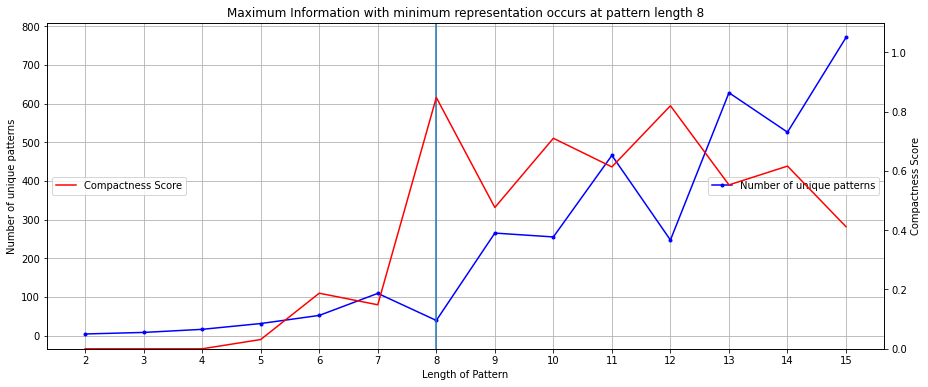

In [ ]:
x=pd.read_csv('/content/drive/MyDrive/Project/brown.csv')
text=''
for i in x.tokenized_text[:100000]:
    text+=i

allowed = set(ascii_letters + ' ')
answer = ''.join(l for l in text if l in allowed)
answer=answer.replace('  ',' ')
text=answer

text=text_transform(text)

text=text[:20008]

plot(text,0,16)

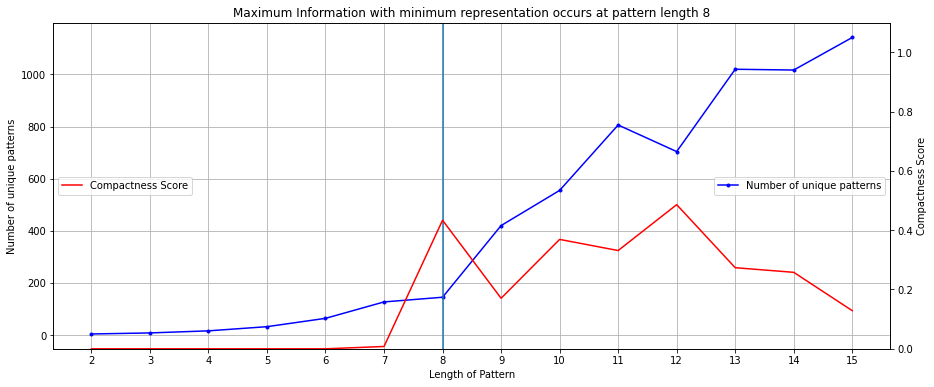

In [ ]:
l=[]
import random
percent=10
for i in range((percent+2)*len(text)//100):
  l.append(random.randint(0,len(text)-1))

l=list(set(l))
l=l[:percent*len(text)//100+1]

flip=''
l.sort()
t=0
for i in range(len(text)):
  try:
    if i==l[t]:
      if text[i]=='0':
        flip+='1'
      else:
        flip+='0'
      t+=1
    else:
      flip+=text[i]
  except:
    flip+=text[i]
    pass


plot(flip,0,16)

In [ ]:
d={}
for i in range(0,len(flip),8):
  try:
    d[flip[i:i+8]]+=1
  except:
    d[flip[i:i+8]]=1

len(d.keys())

182

In [ ]:
#Mishma's Code

In [ ]:
import pandas as pd
def tobinary(ch):
    bit = []
    i = ord(ch)
    while(i != 0):
        bit.append(abs(i%2 - 1))
        i = int(i/2)
    length = len(bit)
    if(len(bit) > 8):
        print(ch)
    while (length < 8):
        #print(length)
        bit.append(0)
        length += 1
    #print(bit)
    return bit

def ToBinary(text):
    bit = []
    for ch in text:
        bit = bit + (tobinary(ch))
    return bit

x=pd.read_csv('/content/drive/MyDrive/Project/brown.csv')
text=''
for i in x.tokenized_text[:10]:
    text+=i

allowed = set(ascii_letters + ' ')
answer = ''.join(l for l in text if l in allowed)
answer=answer.replace('  ',' ')
text=answer

text=ToBinary(text)
len(text)

18256

In [ ]:
s=''
for i in text:
  s+=str(i)

s

'100111000101000010110000110100001110100001011000101100000100100000001000101100000101100011111000011110000011000011111000011110001000100011111000010110001000100000111000000010000101000010110000011110000001100001011000010010000101100010001000110100001111100011010000000010001111100010110000010110001001000001101000001100000110100000001000100010000110100000110000110100001111100011010000111010000110100010001000001010000110100010001000000110001111100001101000110100001111100001001000011110001000100001101000100110000101100000110000110100001100100001100000111110000110100000110000111110001001100001111000011010001011000011111000110100000000100011111000011110001101100001001000011010001101000011111000110100001110100001111000110100001111100001111000100010000110000011111000100110001011000001111000110100000101100010110000100010000110100011010000011000001111100011101000011110000011000011111000011110001111100000111000000010001000100000110000110100000110100011010000010100001101000001101000000010001000100

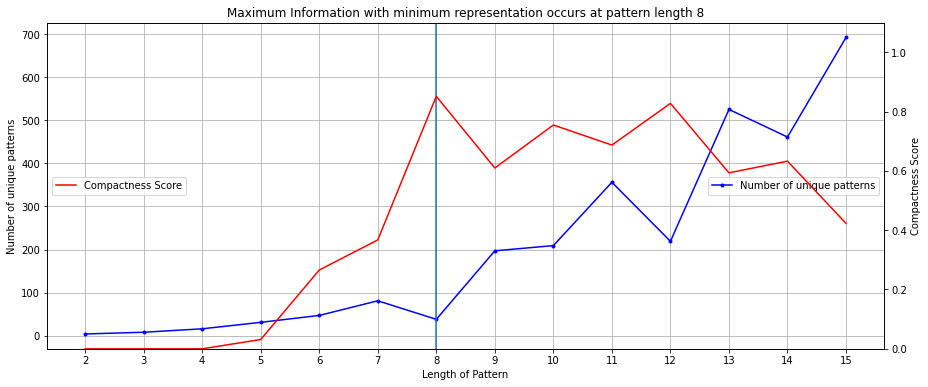

In [ ]:
plot(s,0,16)